In [1]:
import os
import pickle
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [9]:
import rasterio

In [10]:
path = os.path.join("..",  "data", "target", "target_croplands.tif")
data = rasterio.open(path)

In [13]:
data.height

2450

In [47]:
# path = os.path.join("..", "data", "results", "ensemble", "feat_importance_try.pkl")
path = os.path.join("..", "data", "results", "feature_importance", "feat_importance_catboost.pkl")
with open(path, 'rb') as fp:
    fi_model = pickle.load(fp)

# Average over all permutations:
for key, value in fi_model.items():
    fi_model[key] = np.mean(fi_model[key])

In [49]:
# defining paths
path_to_npys_data = os.path.join("/app/ArableLandSuitability", "data", "npys_data")

with open(
    os.path.join(
        "/app/ArableLandSuitability", "data", "processed_files", "pkls", "X_lstm.pkl"
    ),
    "rb",
) as fp:
    X_lstm = pickle.load(fp)
    X_lstm = (X_lstm["Test"][0].astype("float32"), X_lstm["Test"][1].astype("float32"))


In [54]:

with open(os.path.join(path_to_npys_data, "monthly_keys.pkl"), "rb") as fp:
    monthly_keys = pickle.load(fp)
with open(os.path.join(path_to_npys_data, "static_keys.pkl"), "rb") as fp:
    static_keys = pickle.load(fp)


feature_names_dict = {
    "monthly": np.array(monthly_keys).reshape((X_lstm[0].shape[-1], X_lstm[0].shape[-2])),
    "static": np.array(static_keys),
}

In [42]:
df = pd.DataFrame()
feature_importance_scores = []
feature_list = []

keys = list(fi_model.keys())
for i in range(11):
    feature_list.append(keys[i*12][:-3])
feature_list = feature_list+keys[11*12:]

feature_import_mean = dict.fromkeys(feature_list)

for i, feature in enumerate(feature_list):
    if i<11: #11 climatic features, 12 months
        numbers = [fi_model[key] for key in list(fi_model.keys())[i*12:(i+1)*12]]
        feature_importance_scores.append(np.average(numbers))
    else:
        feature_importance_scores.append(fi_model[feature])

prerm_feature_importance = pd.DataFrame(data= feature_importance_scores, index = feature_list, columns=['precision_difference'])
prerm_feature_importance = prerm_feature_importance.sort_values(by=['precision_difference'], ascending=False)
prerm_feature_importance

,precision_difference
latitude,0.203335
longitude,0.111574
min_curvature_11,0.063931
monthly_avg_temp_,0.061106
min_curvature_47,0.042575
windmax_ext_days,0.041465
monthly_precip,0.025493
min_curvature_3,0.020930
snow_moisture,0.017944
tempmin_ext_days_,0.013098


<BarContainer object of 15 artists>

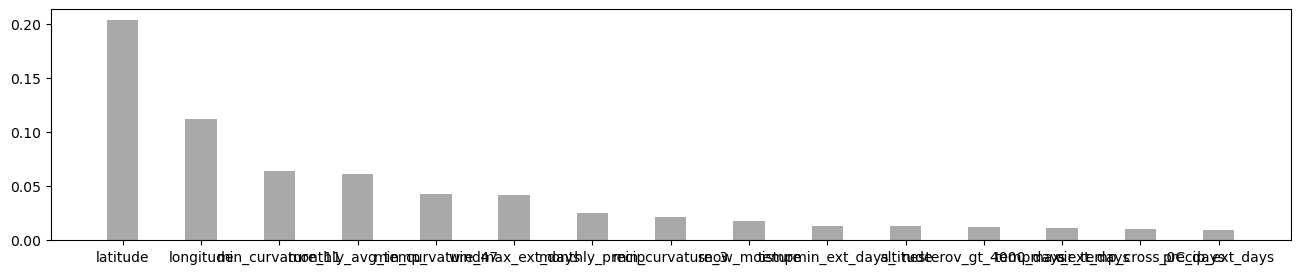

In [43]:
# prerm_feature_importance_lstm = pd.DataFrame(data= feature_import_mean, index = feature_names, columns=['accuracy_difference'])

plt.figure(figsize=(16,3))
plt.bar(list(prerm_feature_importance[:15].index), [i[0] for i in prerm_feature_importance[:15].values], width=0.4, color = 'darkgray')